The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

# load data
nobel = pd.read_csv('nobel_dataset.csv', sep=';')
nobel.head()

,Id,Firstname,Surname,Born,Died,Born country,Born country code,Born city,Died country,Died country code,...,Gender,Year,Category,Overall motivation,Motivation,Organization name,Organization city,Organization country,Geo Shape,Geo Point 2D
0,820,Leonid,Hurwicz,1917-08-21,2008-06-24,Russia,RU,Moscow,USA,US,...,male,2007,Economics,NaN,"""for having laid the foundations of mechanism ...",University of Minnesota,Minneapolis MN,USA,"{""coordinates"": [[[[-155.60651897, 20.13795556...","45.68753333949257, -112.49433391594603"
1,28,Robert A.,Millikan,1868-03-22,1953-12-19,USA,US,Morrison IL,USA,US,...,male,1923,Physics,NaN,"""for his work on the elementary charge of elec...",California Institute of Technology (Caltech),Pasadena CA,USA,"{""coordinates"": [[[[-155.60651897, 20.13795556...","45.68753333949257, -112.49433391594603"
2,90,Murray,Gell-Mann,1929-09-15,2019-05-24,USA,US,New York NY,USA,US,...,male,1969,Physics,NaN,"""for his contributions and discoveries concern...",California Institute of Technology (Caltech),Pasadena CA,USA,"{""coordinates"": [[[[-155.60651897, 20.13795556...","45.68753333949257, -112.49433391594603"
3,562,Carlos Filipe Ximenes,Belo,1948-02-03,NaN,East Timor,TL,Wailacama,NaN,NaN,...,male,1996,Peace,NaN,"""for their work towards a just and peaceful so...",NaN,NaN,NaN,NaN,NaN
4,569,Sully,Prudhomme,1839-03-16,1907-09-07,France,FR,Paris,France,FR,...,male,1901,Literature,NaN,"""in special recognition of his poetic composit...",NaN,NaN,NaN,NaN,NaN


In [3]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    989 non-null    int64 
 1   Firstname             988 non-null    object
 2   Surname               956 non-null    object
 3   Born                  949 non-null    object
 4   Died                  662 non-null    object
 5   Born country          958 non-null    object
 6   Born country code     958 non-null    object
 7   Born city             956 non-null    object
 8   Died country          650 non-null    object
 9   Died country code     650 non-null    object
 10  Died city             644 non-null    object
 11  Gender                989 non-null    object
 12  Year                  989 non-null    int64 
 13  Category              989 non-null    object
 14  Overall motivation    23 non-null     object
 15  Motivation            989 non-null    ob

In [4]:
# Simpan dan tampilkan gender dan negara kelahiran yang paling sering mendapatkan penghargaan dalam variabel yang diminta
top_gender = nobel['Gender'].value_counts().index[0]
top_country = nobel['Born country'].value_counts().index[0]

top_country, top_gender

('USA', 'male')

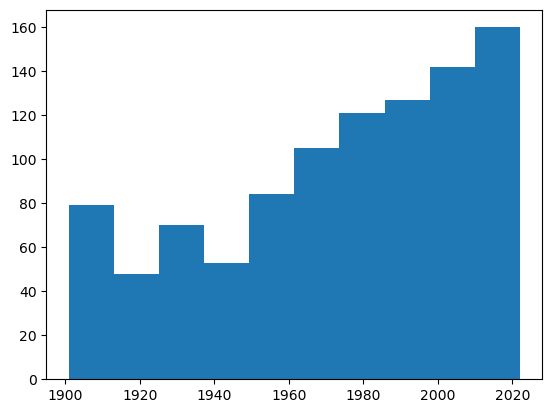

In [7]:
import matplotlib.pyplot as plt

plt.hist(nobel["Year"])
plt.show()

In [8]:
# menghitung proporsi pemenang kelahiran Amerika Serikat untuk setiap dekade
nobel['usa_born_winner'] = nobel['Born country'] == 'USA'
nobel['decade'] = ((nobel['Year'] // 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

prop_usa_winners


,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


In [11]:
# Identifikasi dekade dengan proporsi pemenang kelahiran AS (Amerika Serikat) tertinggi
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]
max_decade_usa

2000

c:\Users\akmal\anaconda3\envs\keras_env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


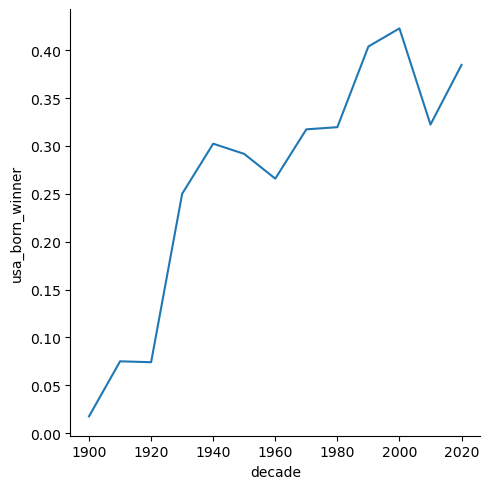

In [12]:
ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line")


In [13]:
nobel['Gender'].value_counts()

Gender
male      898
female     61
org        30
Name: count, dtype: int64

In [14]:
# menghitung proporsi pemenang nobel perempuan per dekade
nobel['female_winner'] = nobel['Gender'] == 'female'
prop_female_winners = nobel.groupby(['decade', 'Category'], as_index=False)['female_winner'].mean()
prop_female_winners

,decade,Category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
67,2020,Economics,0.000000
68,2020,Literature,0.666667
69,2020,Medicine,0.000000
70,2020,Peace,0.166667


In [15]:
# dekade dan kategori dengan proporsi penerima Nobel perempuan tertinggi
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'Category']] 
max_female_decade_category

,decade,Category
68,2020,Literature


In [17]:
# membuat dictionary yang berisi pasangan dekade dan kategori
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['Category'].values[0]}
max_female_dict

{2020: 'Literature'}

c:\Users\akmal\anaconda3\envs\keras_env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


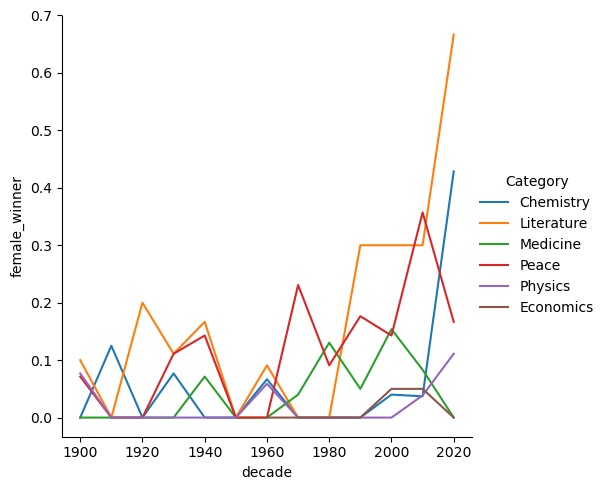

In [19]:
ax2 = sns.relplot(x='decade', y='female_winner', hue='Category', data=prop_female_winners, kind="line")

In [21]:
# pemenang nobel perempuan pertama
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['Year'] == nobel_women['Year'].min()]
first_woman_name = min_row['Firstname'].values[0] + ' ' +min_row['Surname'].values[0]
first_woman_category = min_row['Category'].values[0]
print(f'pemenang nobel perempuan pertama adalah {first_woman_name} dalam kategori {first_woman_category}')

pemenang nobel perempuan pertama adalah Marie Curie dalam kategori Physics


In [27]:
# pemenang nobel 2 kali atau lebih
counts = (nobel['Firstname']+ ' ' +nobel['Surname']).value_counts()
repeats = (counts[counts >= 2].index)
repeat_list = list(repeats)
repeat_list

['Barry Sharpless',
 'Frederick Sanger',
 'Marie Curie',
 'Linus Pauling',
 'John Bardeen']